In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns

# optional (for nicer df display in notebook)
from IPython.display import display

df = pd.read_csv("housing_data.csv")


In [8]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [14]:
df.describe()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [13]:
# Missing summary
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False)


Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
dtype: int64

In [16]:
target = "SalePrice"   
assert target in df.columns

In [17]:
# If there is an unnamed index column:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# duplicates
df = df.drop_duplicates().reset_index(drop=True)


In [18]:
# Electrical: fill with mode (single value missing)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# GarageYrBlt: create indicator and impute with YearBuilt or median
df['GarageYrBlt_missing'] = df['GarageYrBlt'].isnull().astype(int)
# if GarageYrBlt missing but Garage exists, use YearBuilt else fill with median
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
# or: df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


In [19]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']               # age at sale
df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df['Price_per_sqft'] = df['SalePrice'] / df['GrLivArea']      # careful with zeros
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']


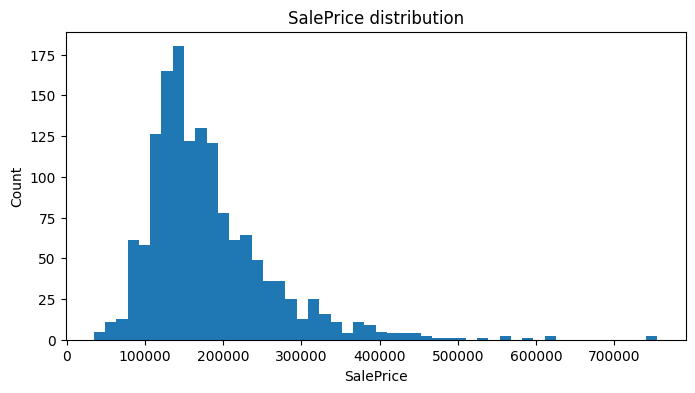

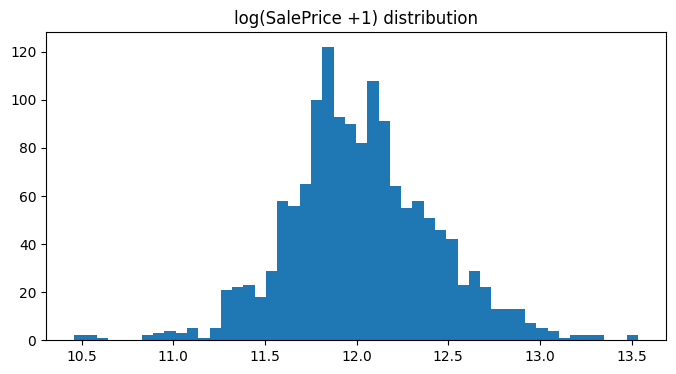

In [20]:
plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'], bins=50)
plt.title('SalePrice distribution'); plt.xlabel('SalePrice'); plt.ylabel('Count'); plt.show()

# log transform view
plt.figure(figsize=(8,4))
plt.hist(np.log1p(df['SalePrice']), bins=50)
plt.title('log(SalePrice +1) distribution'); plt.show()


SalePrice         1.000000
OverallQual       0.790982
TotalSF           0.778959
GrLivArea         0.708624
GarageCars        0.640409
TotalBath         0.631731
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
Price_per_sqft    0.575505
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
GarageYrBlt       0.508043
YearRemodAdd      0.507101
Name: SalePrice, dtype: float64


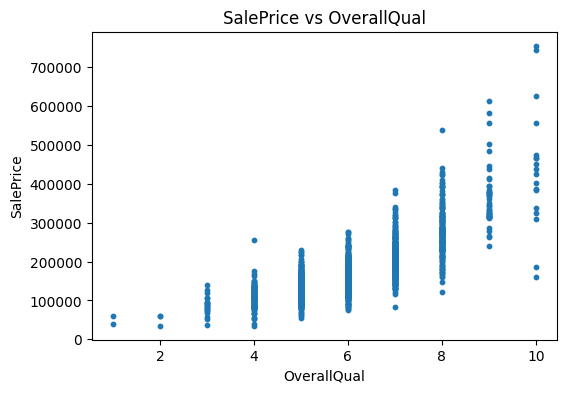

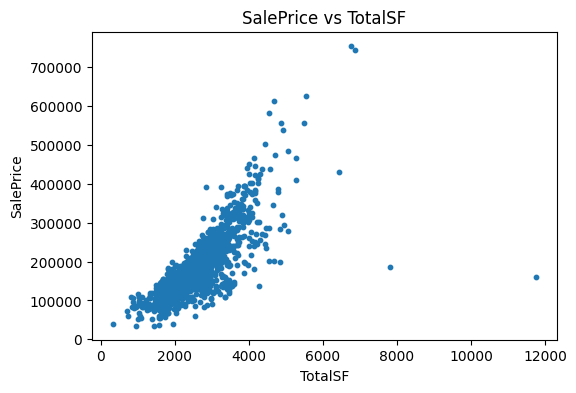

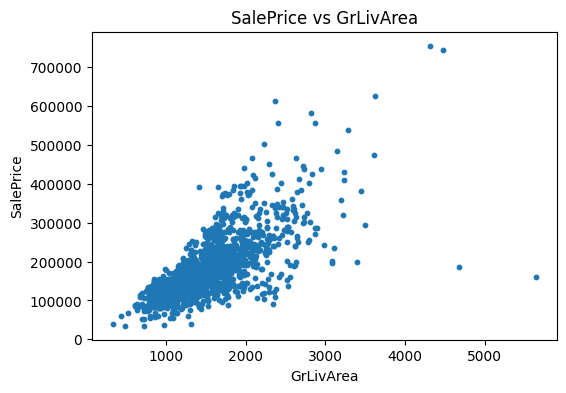

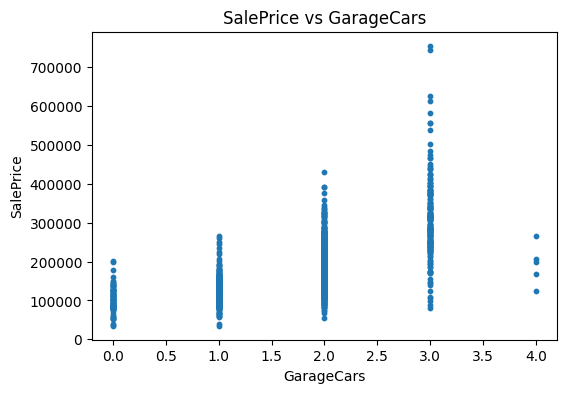

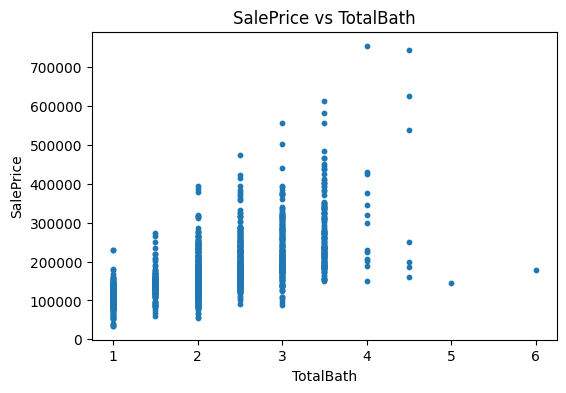

In [21]:
# Correlation with SalePrice
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corrs = df[num_cols].corr()['SalePrice'].sort_values(ascending=False)
print(corrs.head(15))

# Scatter: SalePrice vs top features
top_feats = corrs.index[1:6].tolist()  # top 5 (skip SalePrice itself)
for f in top_feats:
    plt.figure(figsize=(6,4))
    plt.scatter(df[f], df['SalePrice'], s=10)
    plt.title(f"SalePrice vs {f}")
    plt.xlabel(f); plt.ylabel('SalePrice'); plt.show()


In [22]:
# remove obvious outliers by domain rules, e.g.
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

# or use IQR for price:
Q1 = df['SalePrice'].quantile(0.01)
Q99 = df['SalePrice'].quantile(0.99)
df = df[(df['SalePrice'] >= Q1) & (df['SalePrice'] <= Q99)]


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# pick feature lists
num_features = df.select_dtypes(include=[np.number]).drop(columns=['SalePrice']).columns.tolist()
cat_features = df.select_dtypes(include=['object','category']).columns.tolist()

# simple preprocessing
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [26]:
X = df.drop(columns=['SalePrice'])
y = np.log1p(df['SalePrice'])   # log-transform target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_lr = Pipeline(steps=[('pre', preprocessor), ('model', LinearRegression())])
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
# back-transform for metrics:
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(pred)))
mae = mean_absolute_error(np.expm1(y_test), np.expm1(pred))
r2 = r2_score(np.expm1(y_test), np.expm1(pred))
print("LR RMSE:", rmse, "MAE:", mae, "R2:", r2)


LR RMSE: 23303.131947002083 MAE: 15230.243765097188 R2: 0.9292030164205322


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model_rf = Pipeline(steps=[('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))])
# CV (on log-target)
cv_scores = -cross_val_score(model_rf, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
cv_rmse = np.sqrt(cv_scores).mean()
print("CV RMSE (log-target):", cv_rmse)
# Fit + evaluate on test
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(pred_rf)))
print("RF test RMSE (original units):", rmse_rf)


CV RMSE (log-target): 0.14526532406944304
RF test RMSE (original units): 29896.07000054831


In [29]:
# After fitting model_rf:
import numpy as np
# extract feature names from preprocessor
ohe = model_rf.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
cat_names = ohe.get_feature_names_out(cat_features)
feature_names = num_features + list(cat_names)
importances = model_rf.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
display(feat_imp.head(30))


OverallQual          0.542527
GrLivArea            0.114754
TotalBsmtSF          0.044370
GarageCars           0.040132
GarageArea           0.025025
BsmtFinSF1           0.021522
1stFlrSF             0.019103
YearBuilt            0.014611
LotArea              0.014427
CentralAir_N         0.009755
OverallCond          0.009383
YearRemodAdd         0.009119
2ndFlrSF             0.007077
CentralAir_Y         0.006069
BsmtUnfSF            0.005486
OpenPorchSF          0.005443
GarageType_Detchd    0.004784
LotFrontage          0.004544
BsmtQual_Ex          0.004212
Unnamed: 0           0.004016
GarageYrBlt          0.004013
WoodDeckSF           0.003326
BsmtQual_Gd          0.003152
FireplaceQu_No       0.002949
TotRmsAbvGrd         0.002516
Fireplaces           0.002444
GarageType_Attchd    0.002422
MSZoning_RM          0.002283
MasVnrArea           0.002160
GarageFinish_Unf     0.001654
dtype: float64